# Helsinki Bikes Project

"Conclusion:
In this article, we looked at the Helsinki city bike system through the lens of descriptive statistics. This article barely scratched the surface of all the possible analyses that can be performed on the underlying dataset. Those interested in their own exploration can find the dataset on Kaggle"

**I will compliment the descriptive analysis with a machine learning model to predict rides**

# Data exploration & cleaning

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## File 1 - Bike Trips

In [2]:
file1 = pd.read_csv('database.csv', low_memory=False)

In [3]:
file1.shape

(12157458, 14)

In [4]:
file1.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [5]:
file1.dtypes

departure                  object
return                     object
departure_id               object
departure_name             object
return_id                  object
return_name                object
distance (m)              float64
duration (sec.)           float64
avg_speed (km/h)          float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
Air temperature (degC)    float64
dtype: object

In [6]:
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [7]:
file1.columns.value_counts()

departure                 1
return                    1
departure_id              1
departure_name            1
return_id                 1
return_name               1
distance (m)              1
duration (sec.)           1
avg_speed (km/h)          1
departure_latitude        1
departure_longitude       1
return_latitude           1
return_longitude          1
Air temperature (degC)    1
dtype: int64

In [8]:
for col in file1.columns:
    print(col)
    print(len(file1[col].unique()))

departure
8359376
return
8376121
departure_id
671
departure_name
347
return_id
558
return_name
348
distance (m)
21292
duration (sec.)
45084
avg_speed (km/h)
2300804
departure_latitude
347
departure_longitude
347
return_latitude
348
return_longitude
348
Air temperature (degC)
347


In [9]:
#Adding 4 new columns, splitting departure and return columns into 'departure_date', 'departure_time', 'return_date', 'return_time'

file1['departure'] = pd.to_datetime(file1['departure'])

file1['departure_date'] = file1['departure'].dt.date
file1['departure_time'] = file1['departure'].dt.time

file1['return'] = pd.to_datetime(file1['return'])

file1['return_date'] = file1['return'].dt.date
file1['return_time'] = file1['return'].dt.time

file1

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [10]:
file1.isna().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
departure_date                0
departure_time                0
return_date                   0
return_time                   0
dtype: int64

In [11]:
#rename columns
file1.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)', 'departure_date',
       'departure_time', 'return_date', 'return_time'],
      dtype='object')

In [12]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

original_list = ['departure', 'return', 'departure_id', 'departure_name', 'return_id',
                 'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
                 'departure_latitude', 'departure_longitude', 'return_latitude',
                 'return_longitude', 'Air temperature (degC)', 'departure_date',
                 'departure_time', 'return_date', 'return_time']

snake_case_list = [to_snake_case(item) for item in original_list]
print(snake_case_list)


['departure', 'return', 'departure_id', 'departure_name', 'return_id', 'return_name', 'distance_(m)', 'duration_(sec.)', 'avg_speed_(km/h)', 'departure_latitude', 'departure_longitude', 'return_latitude', 'return_longitude', 'air_temperature_(degc)', 'departure_date', 'departure_time', 'return_date', 'return_time']


In [13]:
file1.columns = snake_case_list
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [14]:
#Dropping duplicates
file1 = file1.drop_duplicates()
file1

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00


In [15]:
file1.isna().mean()*100

departure                 0.000000
return                    0.000000
departure_id              0.000000
departure_name            0.000000
return_id                 0.000000
return_name               0.000000
distance_(m)              0.000000
duration_(sec.)           0.000000
avg_speed_(km/h)          0.029201
departure_latitude        0.000000
departure_longitude       0.000000
return_latitude           0.000008
return_longitude          0.000008
air_temperature_(degc)    0.130802
departure_date            0.000000
departure_time            0.000000
return_date               0.000000
return_time               0.000000
dtype: float64

In [16]:
m_speed = file1['avg_speed_(km/h)'].mean()
m_speed

0.3355585469906318

In [17]:
m_temp = file1['air_temperature_(degc)'].mean()
m_temp

15.650438994217291

In [18]:
file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/3854245321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['avg_speed_(km/h)'] = file1['avg_speed_(km/h)'].fillna(m_speed)
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/3854245321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['air_temperature_(degc)'] = file1 ['air_temperature_(degc)'].fillna(m_temp)


In [19]:
file1.isna().sum()

departure                 0
return                    0
departure_id              0
departure_name            0
return_id                 0
return_name               0
distance_(m)              0
duration_(sec.)           0
avg_speed_(km/h)          0
departure_latitude        0
departure_longitude       0
return_latitude           1
return_longitude          1
air_temperature_(degc)    0
departure_date            0
departure_time            0
return_date               0
return_time               0
dtype: int64

In [20]:
f1_cleaned = file1.dropna()

In [21]:
f1_cleaned.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [22]:
f1_cleaned.shape

(12157291, 18)

In [23]:
df = f1_cleaned

In [24]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10


In [25]:
df['month'] = df['departure'].dt.month
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/2438391164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['departure'].dt.month


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10


In [26]:
df['year'] = df['departure'].dt.year
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/3852519227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['departure'].dt.year


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017


In [27]:
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['weekday'] = df['departure_date'].dt.day_name()

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/1082588385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_date'] = pd.to_datetime(df['departure_date'])
/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/1082588385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['departure_date'].dt.day_name()


In [28]:
pd.set_option('display.max_columns', None)
df['day'] = df['departure'].dt.day
df

/var/folders/kd/gp0d9cx1091g1l19n5h72dhr0000gn/T/ipykernel_11377/2780713555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['departure'].dt.day


,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020,Monday,23
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020,Monday,23
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020,Monday,23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020,Monday,23
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020,Monday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4,2017-10-30,23:43:00,2017-10-30,23:55:00,10,2017,Monday,30
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4,2017-10-30,23:49:00,2017-10-31,04:49:00,10,2017,Monday,30
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4,2017-10-30,23:52:00,2017-10-31,00:02:00,10,2017,Monday,30
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4,2017-10-30,23:57:00,2017-10-31,00:00:00,10,2017,Monday,30


In [29]:
df = df[df['year'] != 2016]

In [30]:
df.shape

(11749213, 22)

In [31]:
df['year'].value_counts().sort_values()

2017    1606741
2020    3129083
2018    3225834
2019    3787555
Name: year, dtype: int64

In [32]:
df['month'].value_counts().sort_values() #The city bike season starts on 1 April and ends on 31 October.

3       41369
10     890586
4      902022
9     1464742
5     1940707
7     2085348
6     2206484
8     2217955
Name: month, dtype: int64

In [33]:
df['day'].value_counts().sort_values()

31    203685
2     340380
4     357064
22    357387
30    359813
12    361090
1     362044
5     362370
3     365483
11    367600
8     371062
6     377577
20    380699
13    381624
29    381627
21    387506
23    388400
7     388661
9     391317
24    392724
26    394173
14    395841
19    400890
25    401541
28    403569
10    406578
16    407648
15    410598
17    415921
27    416490
18    417851
Name: day, dtype: int64

In [34]:
df['day'].nunique()

31

In [35]:
pivot_table = df.pivot_table(
    index=['year', 'month', 'day'],
    aggfunc='size',
    fill_value=0
)

pivot_table

year  month  day
2017  5      2      2628
             3      5633
             4      6180
             5      7420
             6      7858
                    ... 
2020  10     27     4765
             28     6722
             29     7198
             30     6733
             31     4775
Length: 826, dtype: int64

In [36]:
days_per_year = df.groupby('year')['day'].count()
days_per_month = df.groupby(['year', 'month'])['day'].count()

print("Days per Year:")
print(days_per_year)

print("\nDays per Month:")
print(days_per_month)


Days per Year:
year
2017    1606741
2018    3225834
2019    3787555
2020    3129083
Name: day, dtype: int64

Days per Month:
year  month
2017  5        246666
      6        311586
      7        332762
      8        357442
      9        236919
      10       121366
2018  4        215963
      5        637263
      6        563511
      7        568042
      8        601208
      9        388912
      10       250935
2019  4        406580
      5        599653
      6        715131
      7        666321
      8        689484
      9        450038
      10       260348
2020  3         41369
      4        279479
      5        457125
      6        616256
      7        518223
      8        569821
      9        388873
      10       257937
Name: day, dtype: int64


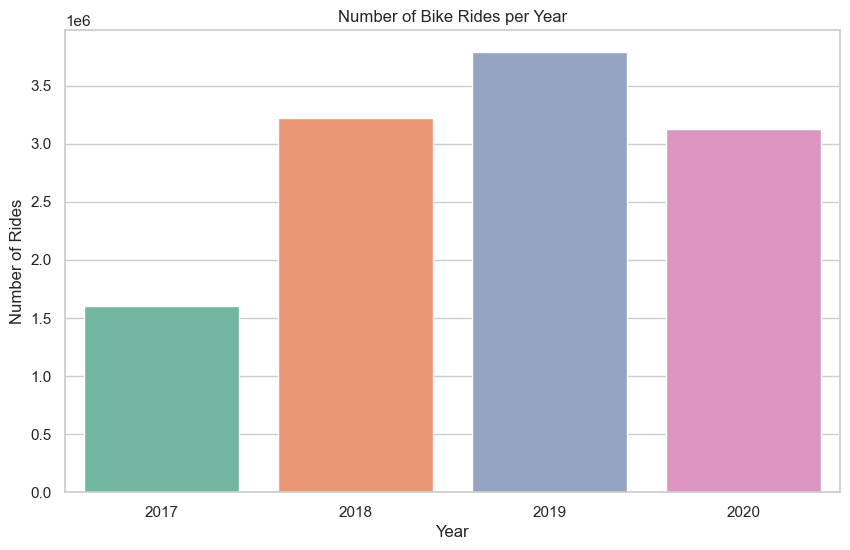

In [37]:
#Count of Rides per year

sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', palette='Set2')
plt.title('Number of Bike Rides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.show()

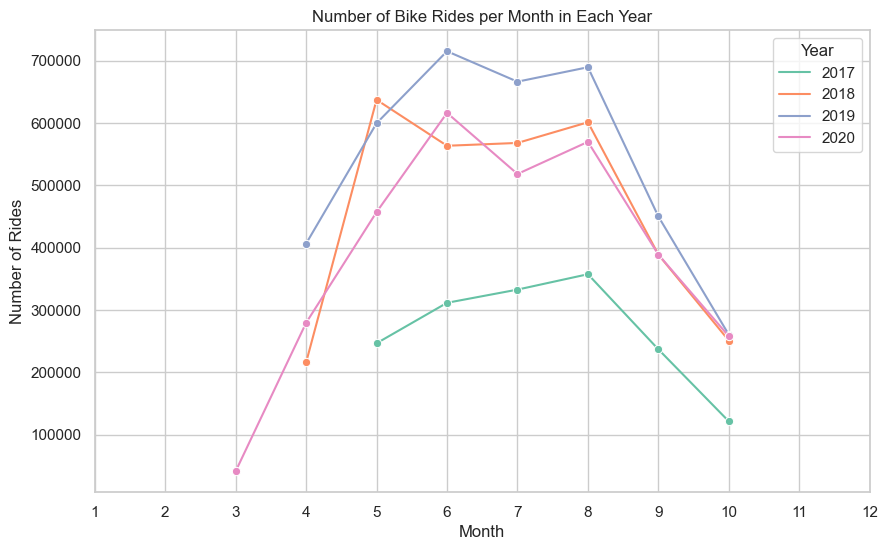

In [38]:

ride_counts = df.groupby(['year', 'month']).size().reset_index(name='ride_count')

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=ride_counts, x='month', y='ride_count', hue='year', hue_order=[2017, 2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Number of Bike Rides per Month in Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title='Year')

plt.show()

Here we can already see that:

- 2019 was the year with the most bike rides
- The most popular months are June, July and August

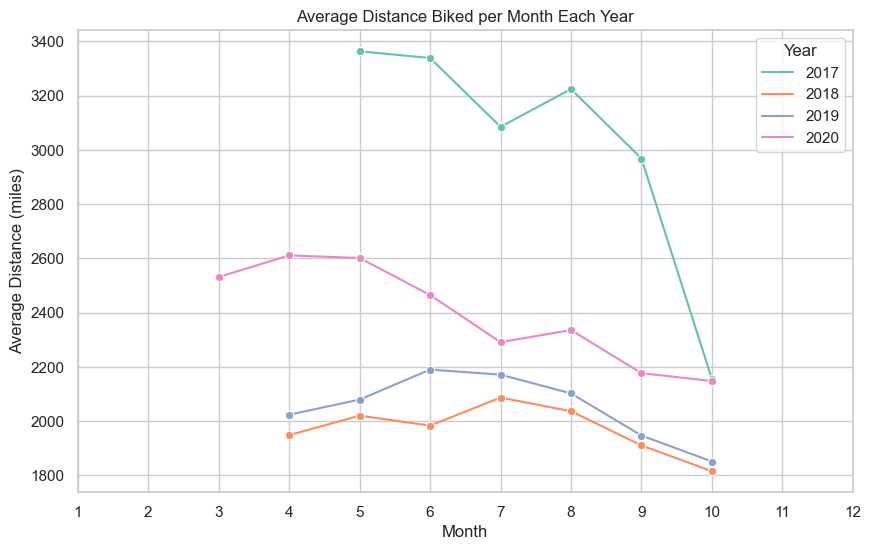

In [40]:
avg_distance_per_month = df.groupby(['year', 'month'])['distance_(m)'].mean().reset_index()

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=avg_distance_per_month, x='month', y='distance_(m)', hue='year', hue_order=[2017, 2018, 2019, 2020], palette='Set2', marker='o')

plt.title('Average Distance Biked per Month Each Year')
plt.xlabel('Month')
plt.ylabel('Average Distance (miles)')
plt.xticks(range(1, 13), [str(month) for month in range(1, 13)])  # Set x-axis ticks as month numbers
plt.legend(title='Year')

plt.show()

-  The decrease in distance by the end of the year might be related to weather, we will look into correlation between distance and weather later in the analysis.


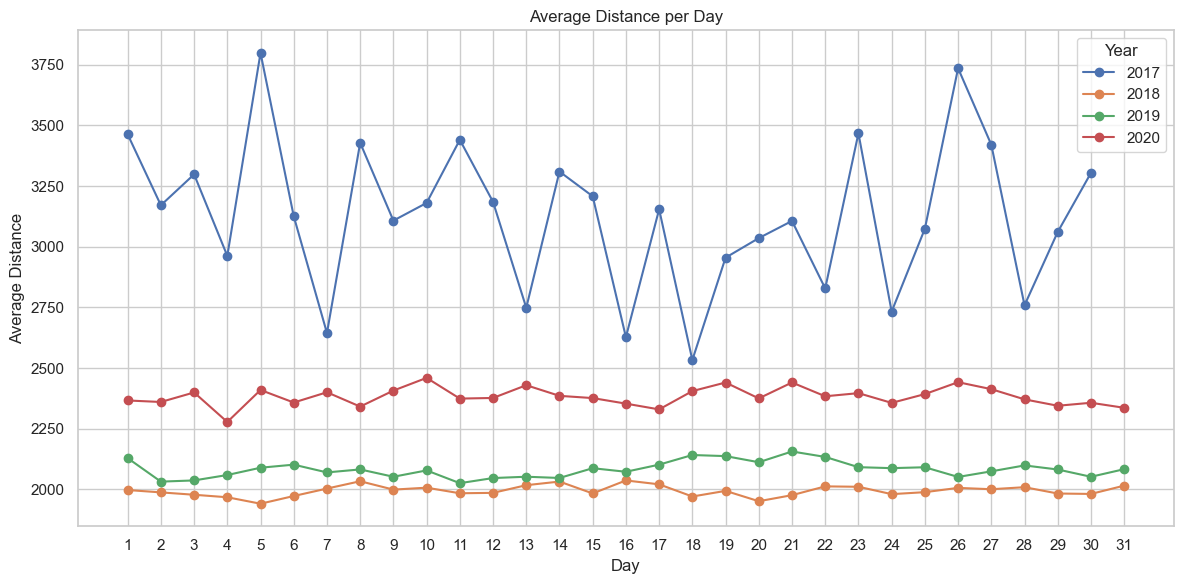

In [41]:
plt.figure(figsize=(12, 6))

# Filter data for each year
for year in [2017, 2018, 2019, 2020]:
    avg_distance_per_year = df[df['year'] == year].groupby('day')['distance_(m)'].mean()

    plt.plot(avg_distance_per_year.index, avg_distance_per_year.values, marker='o', label=str(year))

plt.title('Average Distance per Day')
plt.xlabel('Day')
plt.ylabel('Average Distance')
plt.xticks(avg_distance_per_year.index)
plt.legend(title='Year')

plt.tight_layout()
plt.show()

- It could be that in 2017, there were less docs available, and the bike rides where therefore longer. We can check that later with latitude and longitude points.

- Average distance per day in 2018 and 2019 are similar, under 2,2 km, in 2020, the average distance increased. Could this be related to COVID-19?

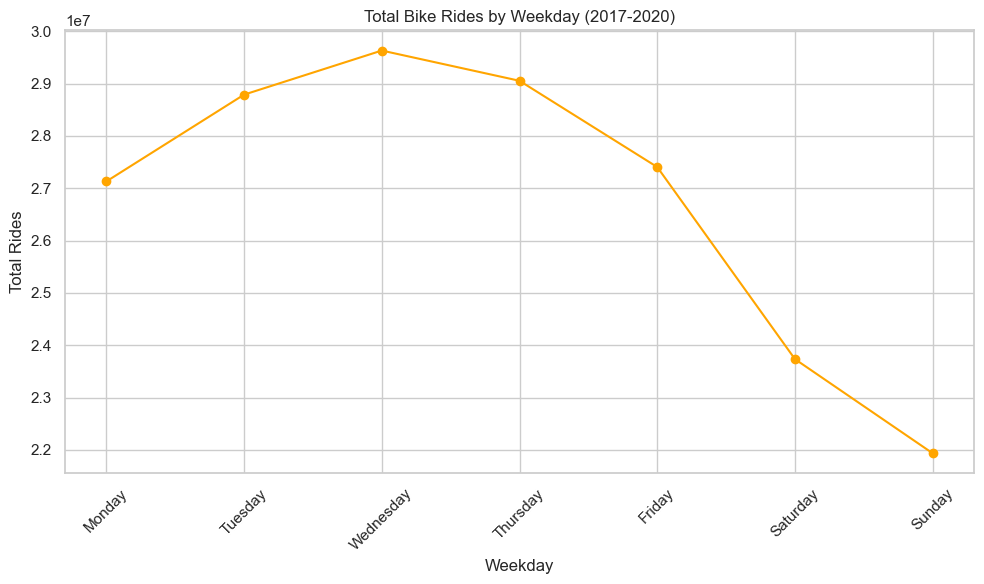

In [52]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_total_rides = df.groupby('weekday')['day'].sum().reindex(weekday_order)

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the line plot
weekday_total_rides.plot(marker='o', color='orange')

plt.title('Total Bike Rides by Weekday (2017-2020)')
plt.xlabel('Weekday')
plt.ylabel('Total Rides')
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)
plt.tight_layout()

plt.show()


- On average, the most rides happened on Wednesdays and Thursdays

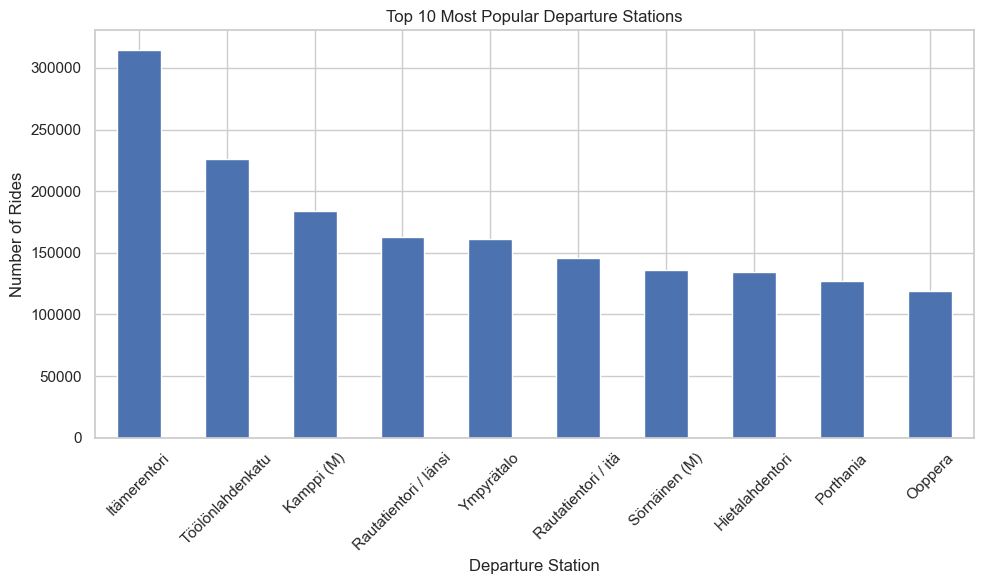

In [83]:
departure_counts = df['departure_name'].value_counts()

# Number of top stations to display
top_n = 10

# Select the top N stations
top_departures = departure_counts.head(top_n)

# Plot the count of rides from the top departure stations
plt.figure(figsize=(10, 6))
top_departures.plot(kind='bar')
plt.title(f'Top {top_n} Most Popular Departure Stations')
plt.xlabel('Departure Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


- Itämerentori is the most popular departure destination. We will look into geographic location later.

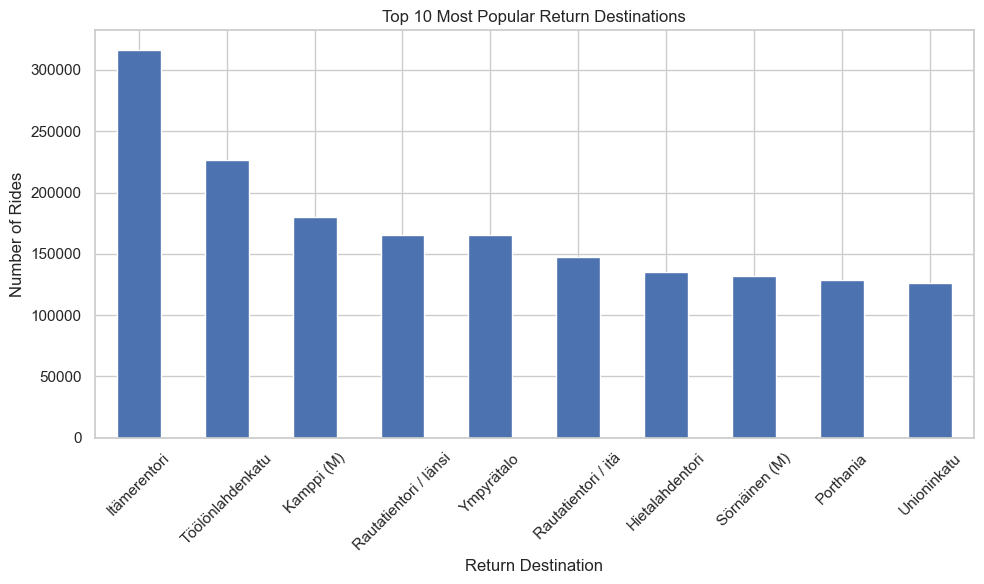

In [81]:
return_counts = df['return_name'].value_counts()

# Number of top destinations to display
top_n = 10

# Select the top N return destinations
top_returns = return_counts.head(top_n)

# Plot the count of rides to the top return destinations
plt.figure(figsize=(10, 6))
top_returns.plot(kind='bar')
plt.title(f'Top {top_n} Most Popular Return Destinations')
plt.xlabel('Return Destination')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

- Itämerentori is also the most popular return destination. We will look into geographic location later.

In [86]:
df.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance_(m),duration_(sec.),avg_speed_(km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,air_temperature_(degc),departure_date,departure_time,return_date,return_time,month,year,weekday,day
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9,2020-03-23,06:09:44,2020-03-23,06:16:26,3,2020,Monday,23
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9,2020-03-23,06:11:58,2020-03-23,06:26:31,3,2020,Monday,23
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9,2020-03-23,06:16:29,2020-03-23,06:24:23,3,2020,Monday,23
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9,2020-03-23,06:33:53,2020-03-23,07:14:03,3,2020,Monday,23
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9,2020-03-23,06:36:09,2020-03-23,07:04:10,3,2020,Monday,23


In [87]:
columns_to_drop = ['departure_id', 'return_id']
df = df.drop(columns=columns_to_drop)

In [88]:
df.shape

(11749213, 20)

In [ ]:
# Look at popular times per day

In [101]:
df.dtypes

departure                 datetime64[ns]
return                    datetime64[ns]
departure_name                    object
return_name                       object
distance_(m)                     float64
duration_(sec.)                  float64
avg_speed_(km/h)                 float64
departure_latitude               float64
departure_longitude              float64
return_latitude                  float64
return_longitude                 float64
air_temperature_(degc)           float64
departure_date            datetime64[ns]
departure_time                    object
return_date                       object
return_time                       object
month                              int64
year                               int64
weekday                           object
day                                int64
dtype: object

In [103]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')
df['departure_hour'] = df['departure_time'].dt.hour

In [107]:
df['departure_hour'].unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2,  3,  4,  5])

# ------------------------------------------------------------------------------------------

## File 2 - Weather

In [ ]:
file2 = pd.read_csv('weather.csv')
file2

In [ ]:
file2.columns

In [ ]:
def to_snake_case(text):
    words = text.split()
    snake_case_words = '_'.join(words).lower()
    return snake_case_words

column_names = [
    "Year", "m", "d", "Time", "Time zone", 
    "Precipitation amount (mm)", "Snow depth (cm)", "Air temperature (degC)"
]

snake_case_column_names = [to_snake_case(column) for column in column_names]
print(snake_case_column_names)


In [ ]:
file2.columns = snake_case_column_names

In [ ]:
file2

In [ ]:
file2.drop(columns=['time','time_zone'], inplace=True)

In [ ]:
file2

In [ ]:
file2.rename(columns={'m': 'month', 'd': 'day'}, inplace=True)
file2

In [ ]:
file2['date_combined'] = pd.to_datetime(file2[['year', 'month', 'day']])
file2

In [ ]:
file2.isna().sum()

In [ ]:
print(df.dtypes)
print(file2.dtypes)

In [ ]:
print(df.shape)
print(file2.shape)

In [ ]:
file2['date_combined'] = file2['date_combined'].astype('object')
file2.dtypes

In [ ]:
#Merging dataframes

In [ ]:
print(df['departure_date'].nunique())
print(file2['date_combined'].nunique())

In [ ]:
print(df.columns)
print(file2.columns)

In [ ]:
df = df.rename(columns = {'departure_date':'date_combined'})  
df.columns

In [ ]:
merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

In [ ]:
df['date_combined'] = pd.to_datetime(df['date_combined'])
file2['date_combined'] = pd.to_datetime(file2['date_combined'])

merged_df = pd.merge(df, file2, left_on='date_combined', right_on='date_combined', how='inner')
merged_df.shape

In [ ]:
merged_df.head()

In [ ]:
merged_df.isna().sum()

In [ ]:
merged_df.dtypes

In [ ]:
columns_to_drop = ['month_x', 'year_x','day_x','air_temperature_(degc)_y']
merged_df = merged_df.drop(columns_to_drop, axis=1)

In [ ]:
merged_df.shape

In [ ]:
merged_df.sort_values(by='date_combined', ascending=True)

In [ ]:
merged_df['avg_speed_(km/h)'].describe()

In [ ]:
merged_df['air_temperature_(degc)_x'].describe()

In [ ]:
merged_df['distance_(m)'].describe()

In [ ]:
merged_df['snow_depth_(cm)'].describe()

In [ ]:
merged_df['precipitation_amount_(mm)'].describe()

In [ ]:
merged_df['duration_(sec.)'].describe()

In [ ]:
merged_df['Hour']=merged_df['departure'].dt.hour
merged_df.head()

In [ ]:
merged_df['Weekday']=merged_df['departure'].dt.weekday

In [ ]:
merged_df.groupby(['departure_name'])['departure_name'].count().sort_values(ascending=False)

In [ ]:
merged_df.groupby(['return_name'])['return_name'].count().sort_values(ascending=False)

In [ ]:
merged_df.groupby(['Hour'])['Hour'].count().plot()

In [ ]:
merged_df.groupby(['Weekday'])['Weekday'].count().plot()

In [ ]:
ax = merged_df.groupby(['Weekday'])['Weekday'].count().plot(kind='bar', color='skyblue')

# Add color to each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

# Add title and labels
ax.set_title('Count of Rides by Weekday', fontsize=12)
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame

color = 'pink'  # Set your desired color here

merged_df.groupby(['air_temperature_(degc)_x'])['air_temperature_(degc)_x'].count().plot(color=color)

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Count')
plt.title('Air Temperature Distribution')
plt.show()


In [ ]:
merged_df['year'] = merged_df['date_combined'].dt.year
merged_df['month'] = merged_df['date_combined'].dt.month
merged_df['day'] = merged_df['date_combined'].dt.day

rides_per_day = df.groupby(['year', 'month', 'day']).size().reset_index(name='ride_count')


rides_per_day

In [ ]:
# Group the data by year, month, and day, and count the number of rides in each group
rides_per_year = df.groupby(['year']).size().reset_index(name='ride_count_year')
rides_per_month = df.groupby(['year', 'month']).size().reset_index(name='ride_count_month')
rides_per_day = df.groupby(['year', 'month', 'day']).size().reset_index(name='ride_count_day')

# Create separate plots for each category
plt.figure(figsize=(10, 6))

# Plot for rides per year
plt.subplot(3, 1, 1)
plt.bar(rides_per_year['year'], rides_per_year['ride_count_year'])
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.title('Number of Bike Rides per Year')

# Plot for rides per month
plt.subplot(3, 1, 2)
plt.bar(rides_per_month['month'], rides_per_month['ride_count_month'])
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Bike Rides per Month')

# Plot for rides per day
plt.subplot(3, 1, 3)
plt.bar(rides_per_day['day'], rides_per_day['ride_count_day'])
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.title('Number of Bike Rides per Day')

plt.tight_layout()
plt.show()
